# Exercises

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

In [12]:
df = pd.read_csv("athletes.csv")
countries = pd.read_csv("countries.csv")
df.describe()
#list(athletes)
#list(countries)
df.head(5)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


## 1. What was the average age in male and female athletes?

In [6]:
#df_athletes = pd.DataFrame(athletes)
#print(df_athletes)
#athletes.dtypes



In [17]:
#dt = datetime.strptime('10/17/69','%m/%d/%y')
#print(dt)

1969-10-17 00:00:00


In [18]:
#Odt = datetime.strptime('08/05/16', '%m/%d/%y')
#print(Odt)

2016-08-05 00:00:00


In [21]:
#relativedelta(Odt,dt).years

46

In [22]:
def Age(row):
    try:
        dt = datetime.strptime(row['dob'], '%m/%d/%y')
        return relativedelta(Odt, dt).years
    except:
        pass

In [23]:
df['age'] = df.apply(lambda x: Age(x), 1)
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,46.0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,29.0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,24.0
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,25.0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,25.0


In [28]:
dfM = df[df['sex']=='male']
dfF = df[df['sex']=='female']

print(dfM['age'].mean());
print(dfF['age'].mean());

26.024320909665192
25.44418828049952


## 2. What are the most common Dates of Birth?

In [29]:
dfDOB = df.groupby('dob')['id'].count().reset_index()
dfDOB.columns = ['dob','count']
dfDOB = dfDOB.sort_values(by='count',ascending=False)
dfDOB.head()

,dob,count
2699,3/5/88,9
1997,2/18/93,9
1573,12/20/90,9
1472,12/14/89,8
4169,6/9/89,8


## 3. How about the most common birthdays?

In [32]:
def Date(row):
    try:
        return str(row['dob'].split('/')[:2])
    except:
        pass

In [33]:
dummy =df.apply(lambda x: Date(x),1)
dummy = pd.DataFrame(dummy)
dummy.columns = ['date']
dummy.head()

,date
0,"['10', '17']"
1,"['9', '23']"
2,"['5', '27']"
3,"['1', '2']"
4,"['11', '26']"


In [34]:
dummy['date'].value_counts().reset_index().head()

,index,date
0,"['1', '1']",58
1,"['2', '5']",51
2,"['2', '10']",48
3,"['1', '20']",47
4,"['1', '10']",47


## 4. What are the Countries with more than 100 medals?

In [35]:
df_medals = pd.melt(df, id_vars=['nationality'],
                   value_vars=['bronze','silver','gold'],
                   value_name='medal_count', var_name = 'medal')

df_medals_national = df_medals.groupby('nationality')['medal_count'].sum().reset_index()
#print(df_medals_national['medal_count'>100])
df_medals_national= df_medals_national.sort_values(by='medal_count', ascending = False)
#print(df_medals_national)
df_medals_top = df_medals_national[df_medals_national['medal_count']>=100]
print(df_medals_top)

    nationality  medal_count
198         USA          264
72          GER          160
68          GBR          145
159         RUS          115
38          CHN          113


## 5. Create a bar or pie chart for the results of the previous exercise.

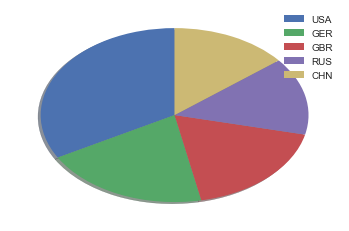

In [10]:
#df_medals_top.plot.bar()
labels = list(df_medals_top['nationality'])
sizes = list(df_medals_top['medal_count'])
patches,text = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc ='best')

## 6. Male weightlifting competitions are divided into 8 weight classes. Can you estimate these weight classes by looking at the data? Hint: Create a scatter plot with Body weight on the x-axis and choose height as y.

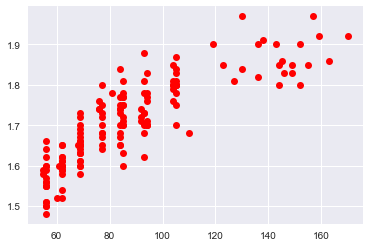

In [40]:
#dfM = athletes['sex'] == 'male'
#dfF = athletes['sex'] == 'female'
#print(dfM)
#dfW = df[df['sport']== 'weightlifting']
#print(dfW)
dfMW = df[(df['sport']=='weightlifting')&(df['sex']=='male')]
#print(dfMW.head())
plt.plot(dfMW['weight'],dfMW['height'],'ro')
plt.show()

## 7. Generate a histogram of male and female height distribution among all participants.

In [41]:
df[['sex','height']].head()

,sex,height
0,male,1.72
1,female,1.68
2,male,1.98
3,male,1.83
4,male,1.81


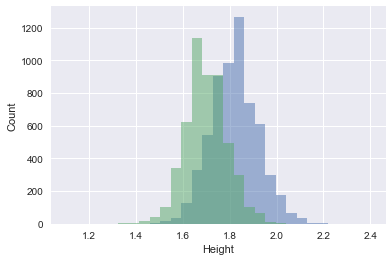

In [42]:
bins = np.linspace(1.1, 2.4, 30)
plt.hist(list(dfM['height'].dropna()),bins,alpha=0.5)
plt.hist(list(dfF['height'].dropna()),bins,alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

## 8. Using the Seaborn package create a box plot for male and female height distribution among all participants.

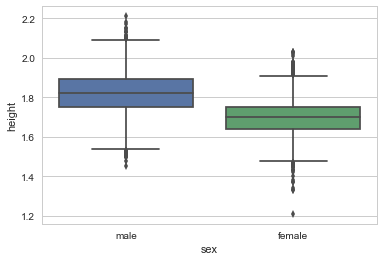

In [43]:
sns.set_style('whitegrid')
ax = sns.boxplot(x='sex', y='height', data = df)

## 9. Create a world map for countries and their respective amount of medals in Carto. [Carto](http://carto.com) provides a quick and easy way to create maps. For this you will also need to use 'countries.csv'.

In [44]:
dfTotal = df_medals_national[df_medals_national['medal_count']>0]
dfTotal.head()

,nationality,medal_count
198,USA,264
72,GER,160
68,GBR,145
159,RUS,115
38,CHN,113


In [45]:
countries.columns =['country','nationality']
countries.head()


,country,nationality
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND


In [46]:
dfTotal = dfTotal.merge(countries, how='left', on = 'nationality')
dfTotal.head()

,nationality,medal_count,country
0,USA,264,United States
1,GER,160,Germany
2,GBR,145,United Kingdom
3,RUS,115,Russia
4,CHN,113,China


## 10. _Optional_: What else would you try?